In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
sns.set()

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


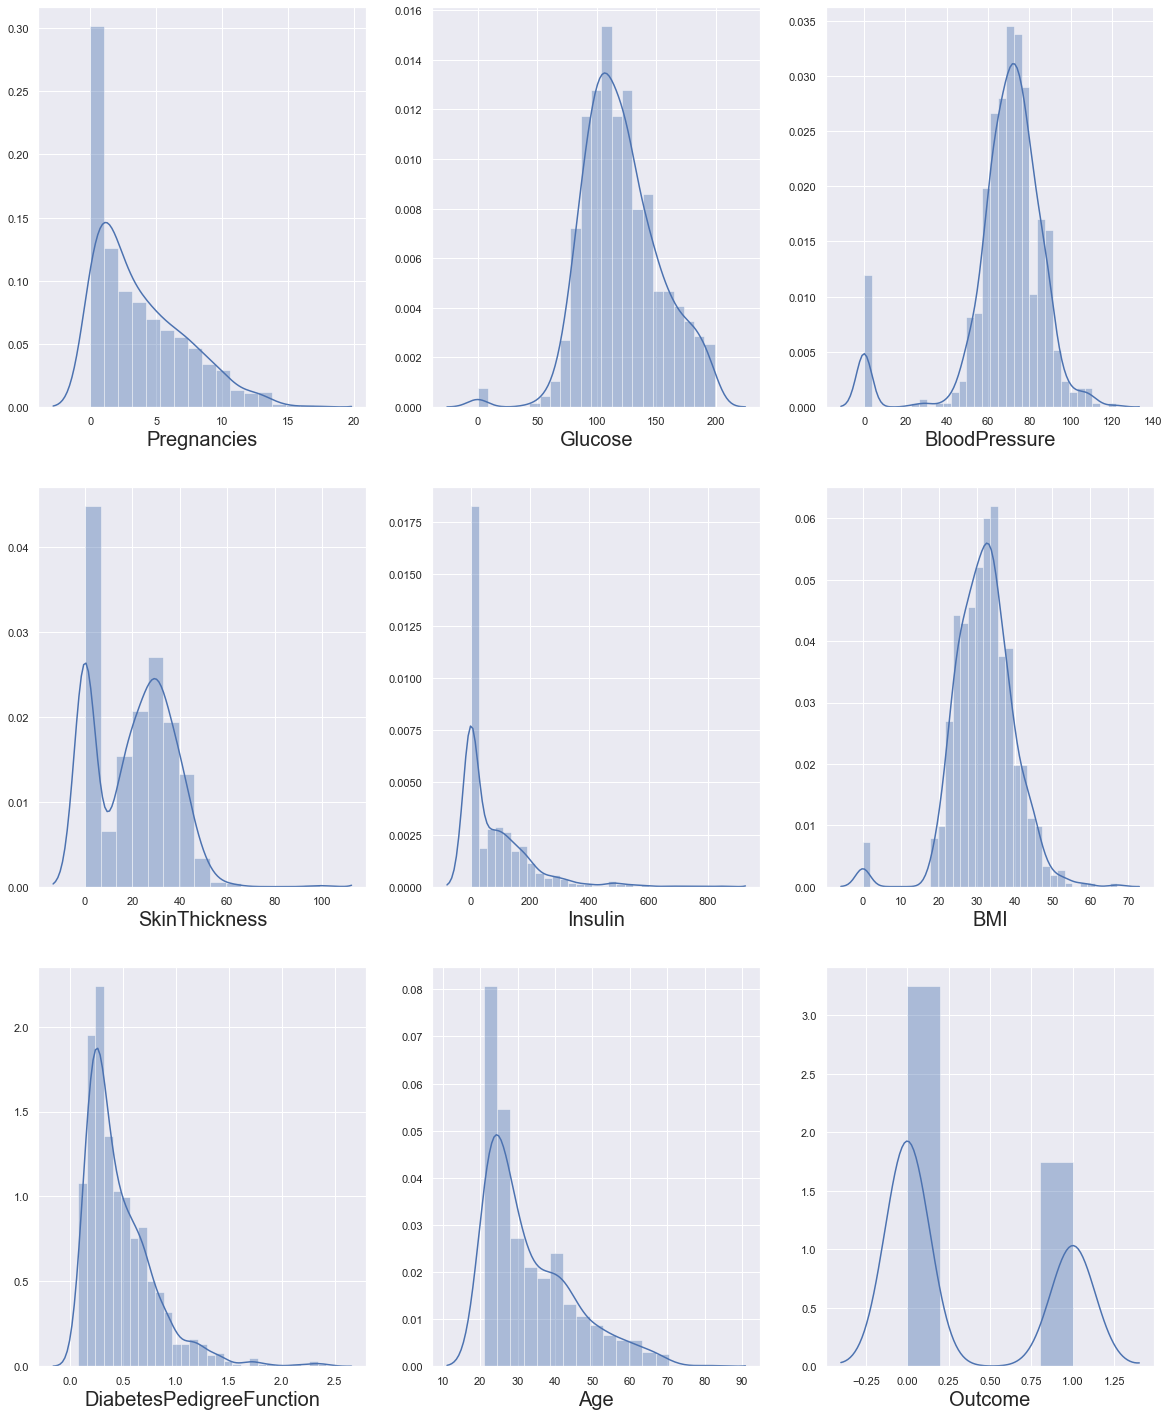

In [6]:
# lets check data destribution of every col
plt.figure(figsize=(20,25), facecolor='white')
plotno=1
for col in df.columns:
    
    if plotno <=9:    
        ax = plt.subplot(3,3,plotno)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
        plotno +=1

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [9]:
df['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

<AxesSubplot:xlabel='BMI'>

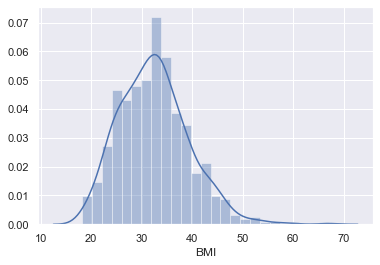

In [10]:
sns.distplot(df['BMI'])

In [11]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())

In [12]:
#  Insulin, skin thickness, BMI and Blood Pressure
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())

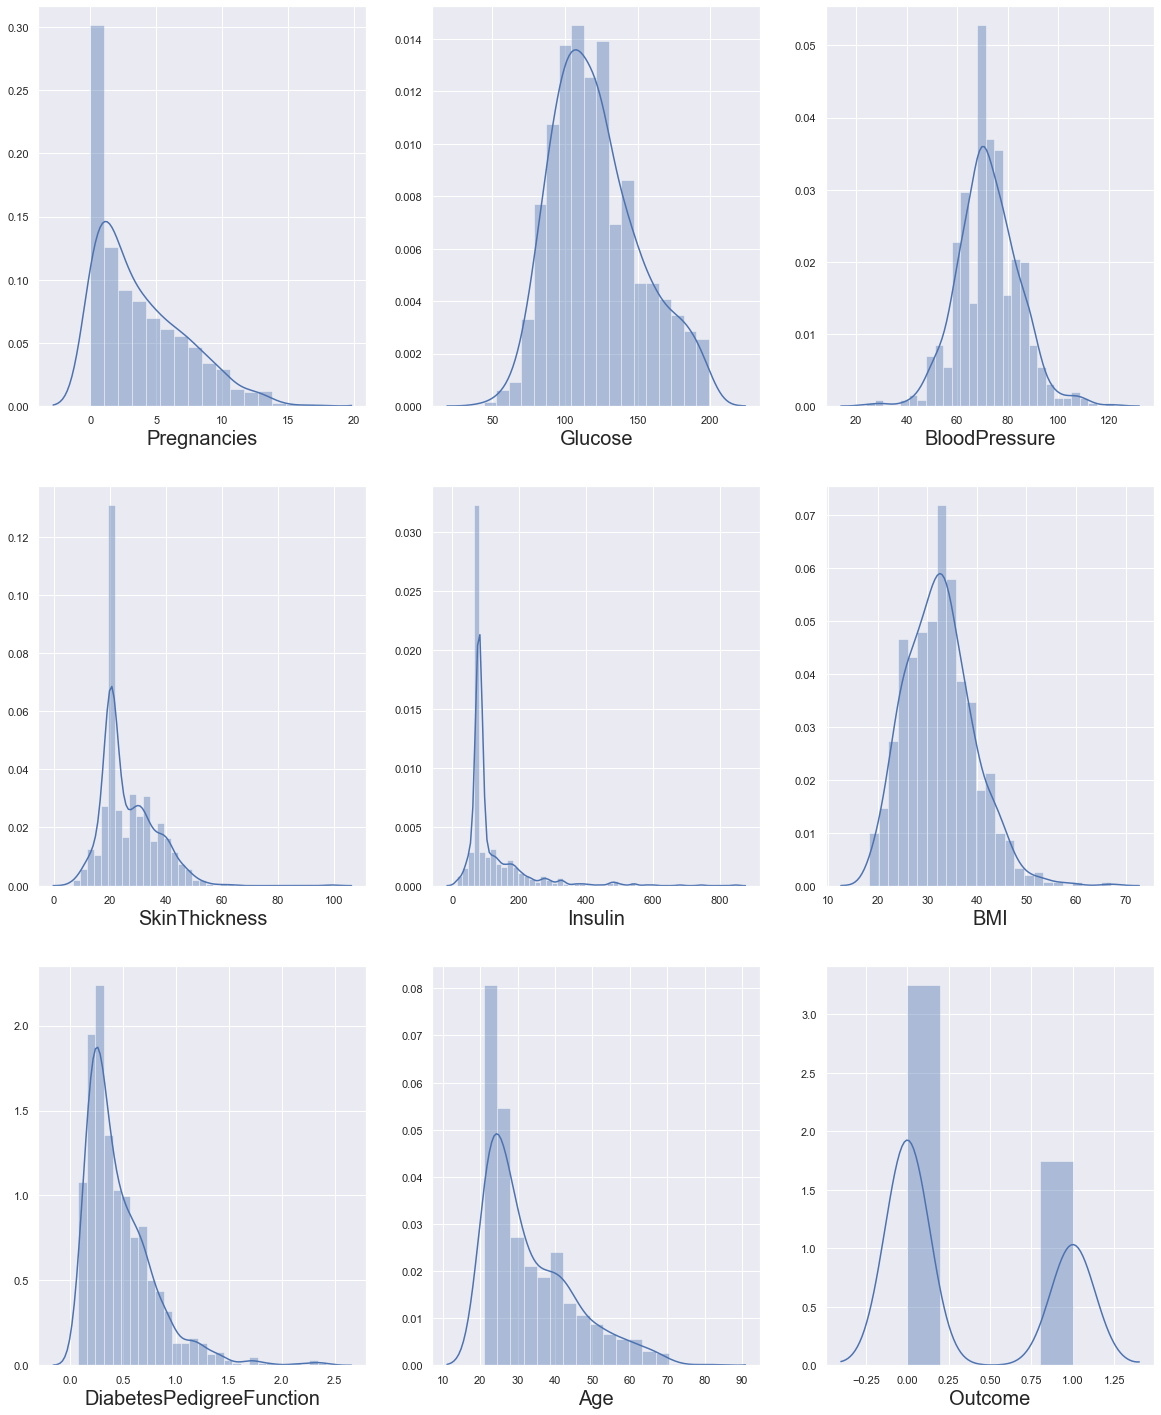

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotno = 1
for col in df.columns:
    if plotno <=9:
        ax = plt.subplot(3,3,plotno)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=20)
        plotno +=1

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.
Let's deal with them.

<AxesSubplot:>

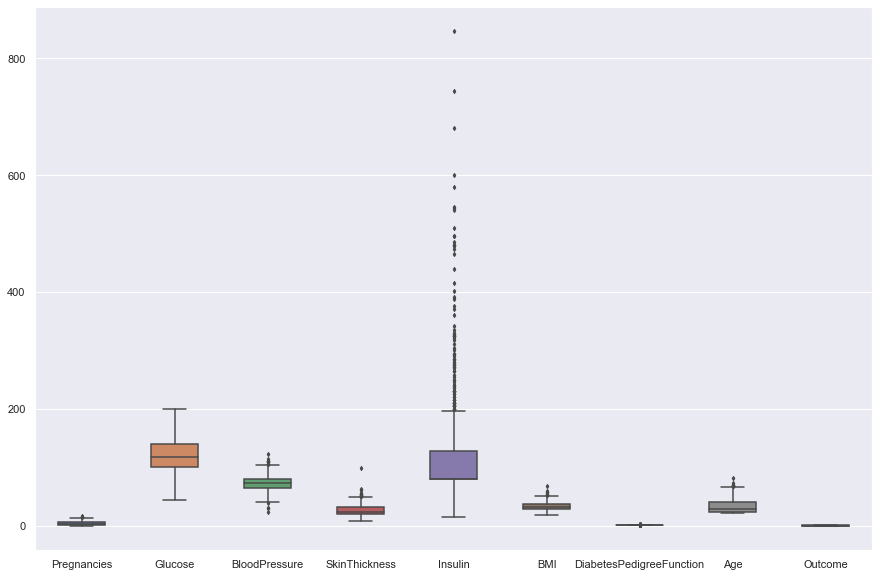

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax, width=0.5, fliersize=3)

In [15]:
# we are removing the top 2% data from the Pregnancies column
q = df['Pregnancies'].quantile(0.98)

In [16]:
q

12.0

In [17]:
df_cleaned = df[df['Pregnancies'] < q]

In [18]:
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
q = df_cleaned['BMI'].quantile(0.99)

In [20]:
q

51.28799999999987

In [21]:
df_cleaned = df_cleaned[df_cleaned['BMI'] < q]

In [22]:
q = df_cleaned['SkinThickness'].quantile(0.99)
df_cleaned = df_cleaned[df_cleaned['SkinThickness'] < q]

In [23]:
q = df_cleaned['Insulin'].quantile(0.95)

In [24]:
df_cleaned = df_cleaned[df_cleaned['Insulin']<q]

In [25]:
q = df_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
df_cleaned = df_cleaned[df_cleaned['DiabetesPedigreeFunction'] < q]
q = df_cleaned['Age'].quantile(0.99)
df_cleaned = df_cleaned[df_cleaned['Age'] < q]
# we are removing the top 1% data from the Age column

In [26]:
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<AxesSubplot:>

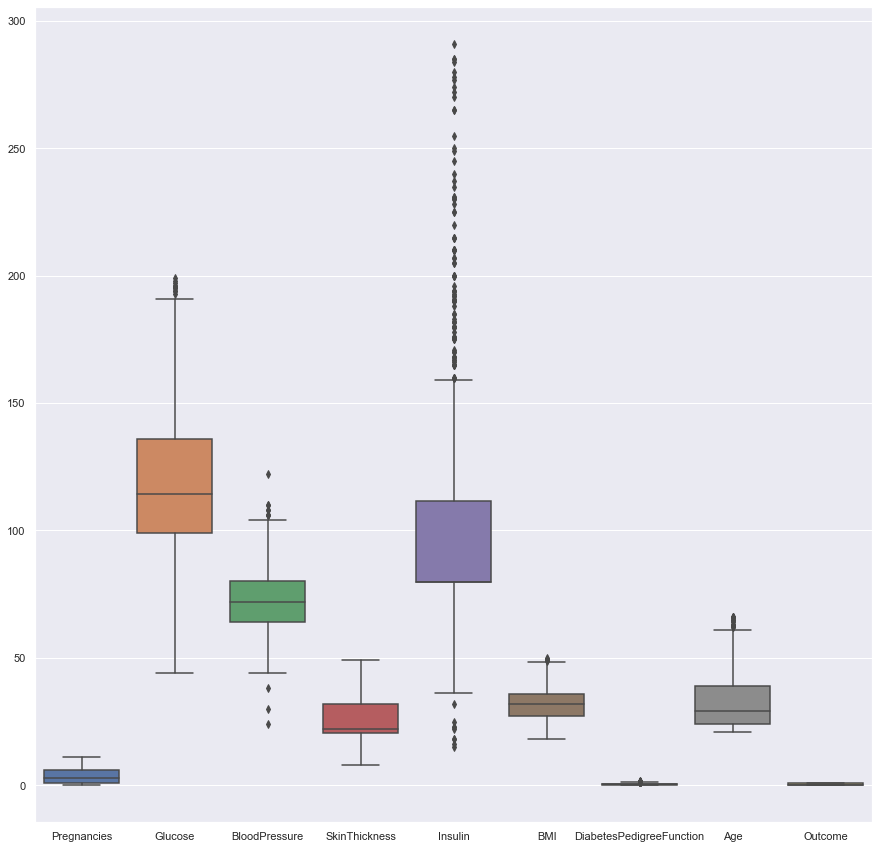

In [27]:
plt.figure(figsize=(15,15), facecolor='white')
sns.boxplot(data=df_cleaned)

In [28]:
df_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,3.602374,119.217318,71.994622,25.721354,101.061453,31.904204,0.447338,32.454006,0.327893
std,3.011478,29.272890,11.891728,8.507237,49.005425,6.384238,0.285170,10.964692,0.469794
min,0.000000,44.000000,24.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.300000,0.238000,24.000000,0.000000
50%,3.000000,114.500000,72.000000,22.000000,79.799479,31.992578,0.356000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,111.500000,35.800000,0.600000,39.000000,1.000000
max,11.000000,199.000000,122.000000,49.000000,291.000000,50.000000,1.476000,66.000000,1.000000


In [29]:
# df['Insulin'].max()

# df_cleaned['Insulin'].max()

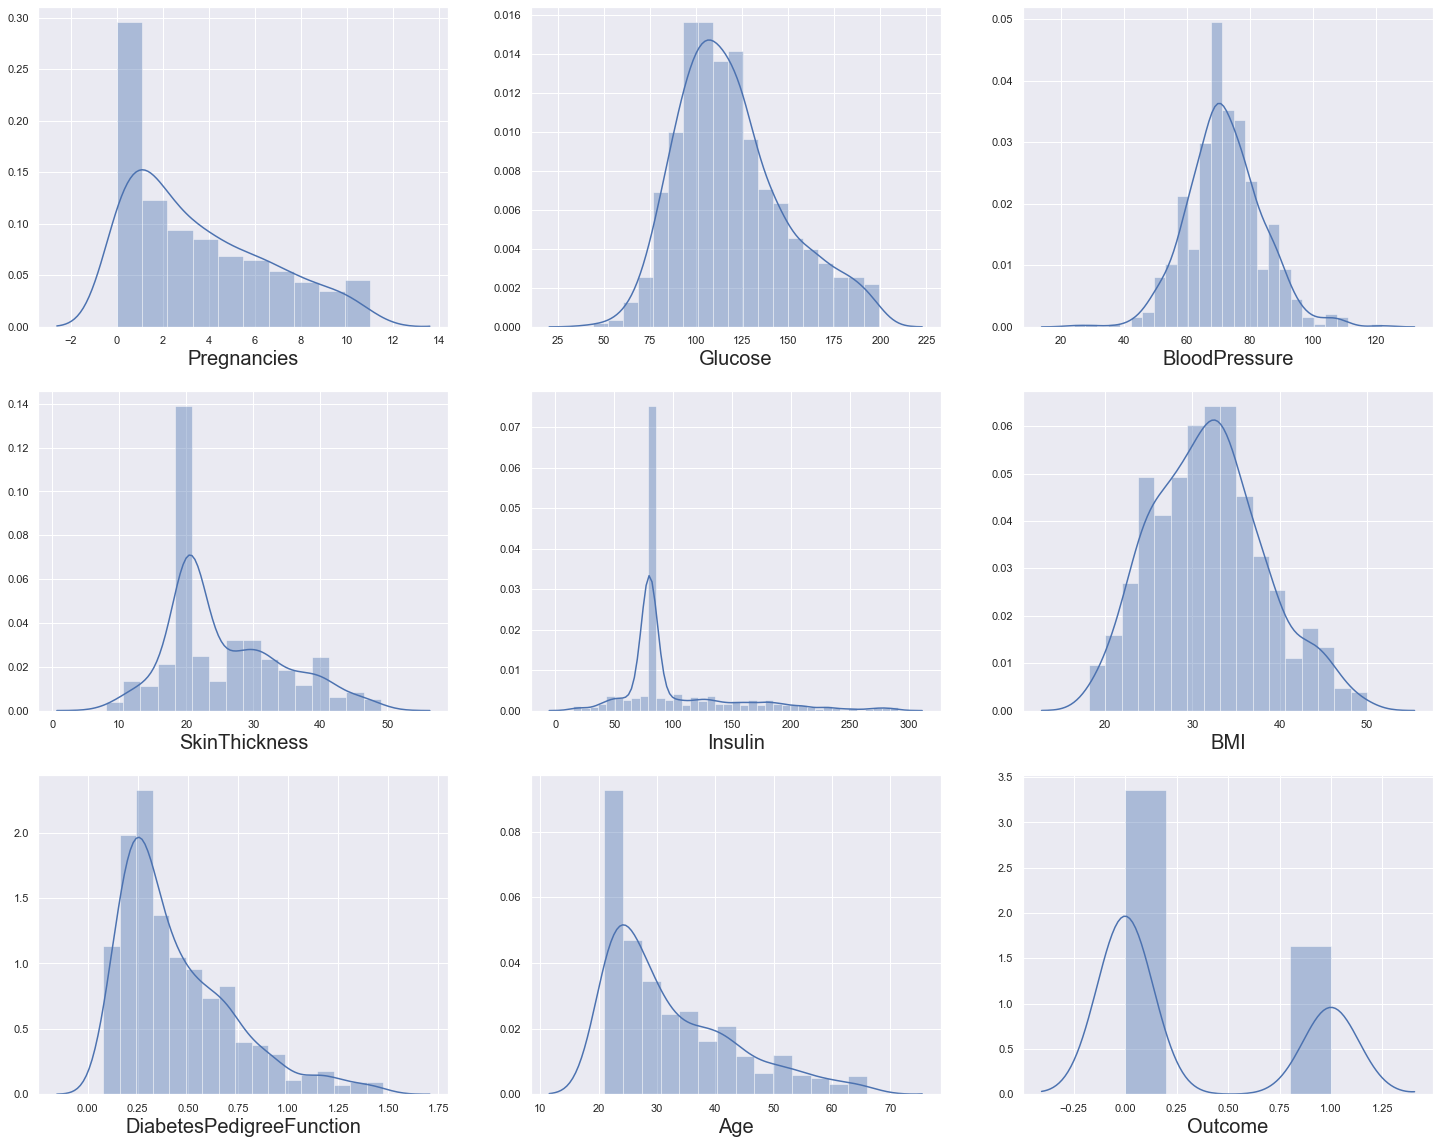

In [30]:
#check destribution
plt.figure(figsize=(25,20), facecolor='white')
plotno = 1
for col in df_cleaned.columns:
    if plotno <=9:
        plt.subplot(3,3,plotno)
        sns.distplot(df_cleaned[col])
        plt.xlabel(col, fontsize=20)
    plotno +=1

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information.
If our model doesn't work with accuracy, we will come back for more preprocessing.


In [31]:
X = df_cleaned.drop(['Outcome'], axis=1)

In [32]:
y = df_cleaned['Outcome']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

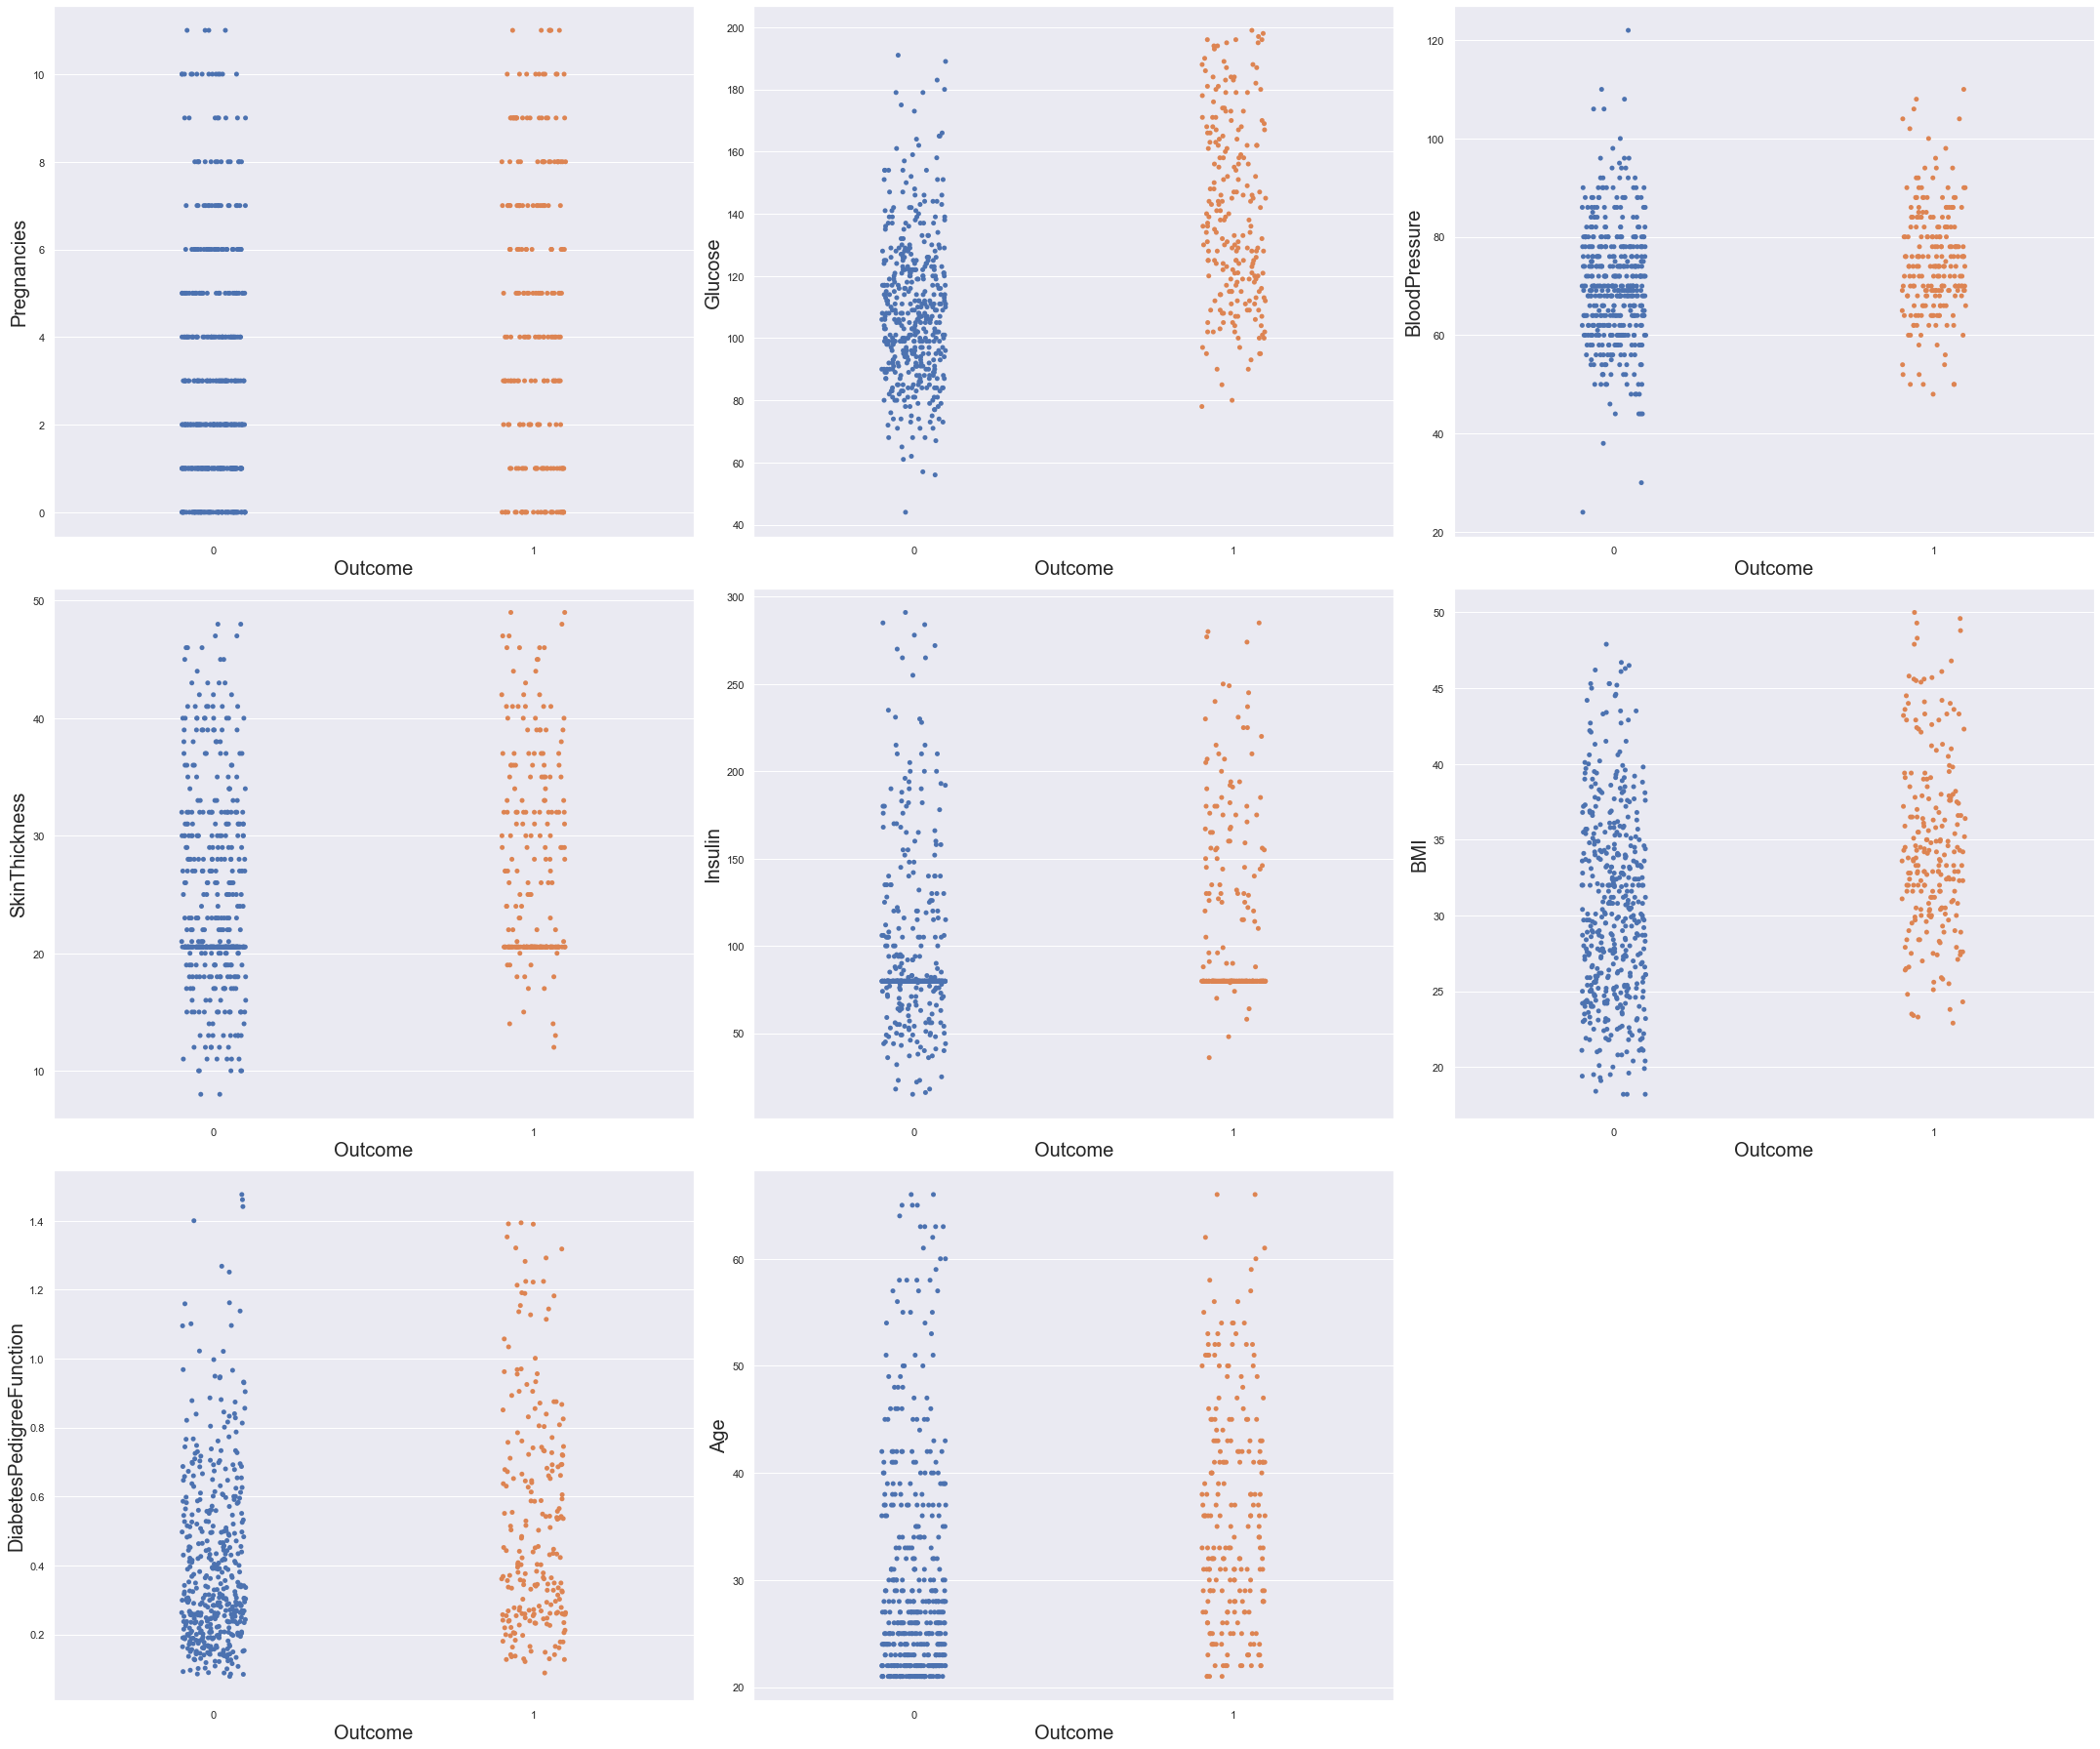

In [33]:
plt.figure(figsize=(30,25), facecolor='white')
plotno = 1
for col in df_cleaned:
    if plotno <=8:
        plt.subplot(3,3,plotno)
        sns.stripplot(y,df_cleaned[col])
        plt.xlabel('Outcome', fontsize=20)
        plt.ylabel(col, fontsize=20)
    plotno +=1
plt.tight_layout()

Let's proceed by checking multicollinearity in the dependent variables.
Before that, we should scale our data. Let's use the standard scaler for that.


In [34]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()



In [35]:
st.fit(X)

StandardScaler()

In [36]:
X_scaled = st.transform(X)

In [37]:
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [38]:
vif = pd.DataFrame()

In [39]:
vif['vif']  = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

In [40]:
vif['Feature'] = X.columns

In [41]:
vif

,vif,Feature
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. 
Now, we can go ahead with fitting our data to the model.
Before that, let's split our data in test and training set.


In [42]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [43]:
logReg = LogisticRegression()

In [44]:
logReg.fit(x_train, y_train)

LogisticRegression()

In [45]:
# save the model in pickle file
import pickle
filename = 'LogisticRegression_model_1.sav'
with open(filename, 'wb') as f:
    pickle.dump(logReg,f)

In [46]:
filename_sc = 'standardscaler_1.sav'
with open(filename_sc, 'wb') as f:
    pickle.dump(st,f)

In [47]:
# ff = pickle.load(open(filename_sc, 'rb'))

# ff.transform([[1,2,3,4,5,6,7,8]])

# Pregnancies = float(1)
# Glucose_Level = float(2)
# BloodPressure= float(3)
# SkinThickness= float(4)                    
# Insulin=float(5) 
# BMI=float(6)
# DiabetesPedigreeFunction=float(7)
# Age=float(8)

# st_data = ff.transform([[Pregnancies, Glucose_Level, BloodPressure, SkinThickness,
#                                    Insulin, BMI, DiabetesPedigreeFunction, Age]])

# st_data

# model.predict(st_data)

In [48]:
model = pickle.load(open('LogisticRegression_model_1.sav', 'rb'))

In [49]:
model.predict(x_train)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [50]:
y_pred = logReg.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report

In [52]:
print(accuracy_score(y_test, y_pred))

0.834319526627219


In [53]:
print(confusion_matrix(y_test, y_pred))

[[109   8]
 [ 20  32]]


In [54]:
conf_mat = confusion_matrix(y_test, y_pred)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       117
           1       0.80      0.62      0.70        52

    accuracy                           0.83       169
   macro avg       0.82      0.77      0.79       169
weighted avg       0.83      0.83      0.83       169



In [56]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [57]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print(Accuracy)

# Precison
Precision = true_positive/(true_positive+false_positive)
print(Precision)

# Recall
Recall = true_positive/(true_positive+false_negative)
print(Recall)

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print(F1_Score)

0.834319526627219
0.9316239316239316
0.8449612403100775
0.8861788617886178


In [58]:
!pip freeze

absl-py==0.9.0
aiofiles==0.5.0
aiohttp==3.6.2
alembic==1.4.2
APScheduler==3.6.3
asn1ate==0.6.0
astor==0.7.1
astropy==4.0.1.post1
async-generator==1.10
async-timeout==3.0.1
attrs==19.3.0
backcall==0.1.0
beautifulsoup4==4.8.1
bleach==3.1.0
blinker==1.4
blis==0.4.1
boto3==1.12.42
botocore==1.15.42
bs4==0.0.1
cachetools==4.1.0
catalogue==1.0.0
certifi==2019.11.28
cffi==1.14.0
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
colorama==0.3.9
colorclass==2.2.0
coloredlogs==10.0
colorhash==1.0.2
config-reader==0.8
confuse==1.3.0
contextvars==2.4
COVID19Py==0.3.0
cryptography==2.9
cycler==0.10.0
cymem==2.0.3
decorator==4.4.0
defusedxml==0.6.0
dnspython==1.16.0
docopt==0.6.2
docutils==0.15.2
ecdsa==0.15
email-templates==0.2.2
emailsender==0.1.3
entrypoints==0.3
fbmessenger==6.0.0
Flask==1.1.1
Flask-Cors==3.0.8
Flask-Mail==0.9.1
Flask-PyMongo==2.3.0
Flask-SQLAlchemy==2.4.1
future==0.18.2
gast==0.2.2
gevent==1.4.0
gitdb==4.0.4
GitPython==3.1.1
google-auth==1.14.0
google-auth-oauthlib==0.4.1
google-pas

In [59]:
# !pip install --upgrade --force-reinstall numpy

In [60]:
!pip install --upgrade --force-reinstall sklearn

Processing c:\users\neeraj bafila\appdata\local\pip\cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074\sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp36-cp36m-win_amd64.whl (6.8 MB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Using cached scipy-1.5.2-cp36-cp36m-win_amd64.whl (31.2 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached numpy-1.19.1-cp36-cp36m-win_amd64.whl (12.9 MB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.16.0
    Uninstalling joblib-0.16.0:
      Successfully uninstalled joblib-0.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1


ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.2 which is incompatible.
ERROR: tensorboard 2.1.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.20.0 which is incompatible.
ERROR: rasa 1.9.6 has requirement matplotlib<3.2,>=3.1, but you'll have matplotlib 3.3.0 which is incompatible.
ERROR: rasa 1.9.6 has requirement scikit-learn<0.23,>=0.22, but you'll have scikit-learn 0.23.2 which is incompatible.
ERROR: rasa 1.9.6 has requirement tqdm<4.32.0,>=4.31.0, but you'll have tqdm 4.48.0 which is incompatible.
ERROR: pandas-profiling 2.8.0 has requirement jinja2>=2.11.1, but you'll have jinja2 2.10.3 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\neeraj bafila\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\~~mpy\\.libs\\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll'
Consider using the `--user` option or chec